<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/Estrutura%20da%20Materia%203/MeiaVida_Tecnesio99m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estrutura da Matéria III

Modalidade: Experimental

Aluna: Úrsula Goulart

Professor: Dr. Wagner de Paula

---

##Experimento 1 - Meia-vida do Nuclídeo

### Objetivo

Calcular $\lambda$, através de 

$$\boxed{N_t = N_0 \ e^{\lambda t}}$$

Para, posteriormente, calcular a meia-vida do nuclídeo em questão

$$\boxed{\tau = \frac{1}{\lambda} }$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

##Eventos de Fundo

Calcular o valor estimado e o erro das contagens dos sinais de fundo.

_Pensar sobre o erro_

In [75]:
data_bk = pd.read_csv('Fundo.csv')

mean_bk = data_bk['contagem'].mean()
print(mean_bk)

3482.3555555555554


##Eventos de sinal

### Construção da tabela de dados

1. Corrigir o número de contagens, subtraindo pela média de contagens do sinal de fundo e em seguida dividir pelo número de contagens do tempo inicial

2. Corrigir o tempo, para que se inicie em $t = 0$



In [92]:
data = pd.read_csv('Ursula.csv')

#data['Diferenca'] = data['contagem'].diff()
#data.fillna(0, inplace=True)

t0 = 170100
contcor0 = 60153.644444
data['TempoCorrigido'] = data['tempo'] -t0
data['ContagemCorrigida'] = (data['contagem'] - mean_bk)
data['LogTaxaMedia'] = np.log10(data['ContagemCorrigida'])

data.head()

,tempo,contagem,TempoCorrigido,ContagemCorrigida,LogTaxaMedia
0,170100,63636,0,60153.644444,4.779262
1,170400,63373,300,59890.644444,4.777359
2,170700,62512,600,59029.644444,4.771070
3,171000,61829,900,58346.644444,4.766016
4,171300,61000,1200,57517.644444,4.759801


###Verificar se os dados seguem a lei de decaimento exponencial



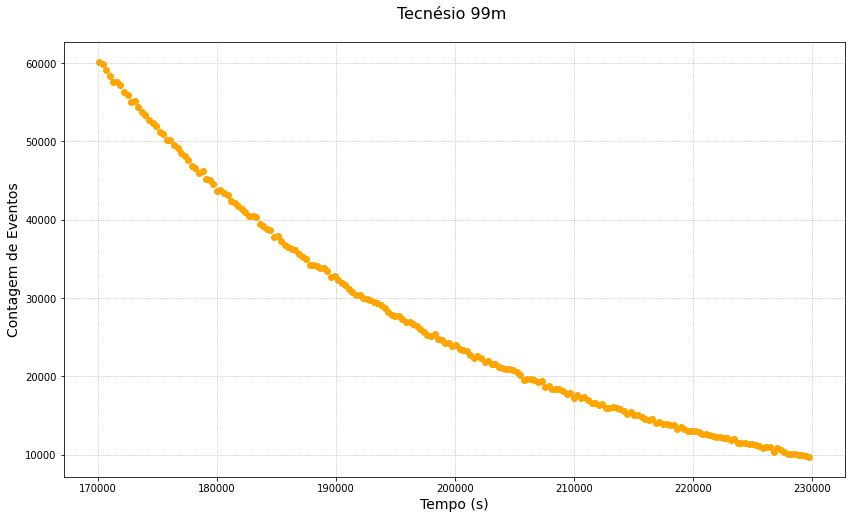

In [88]:
fig = plt.subplots(figsize=(14,8))

plt.scatter(data['tempo'], data['ContagemCorrigida'], c='orange')
plt.title('Tecnésio 99m \n', fontsize='16')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

Para que o $\lambda$ seja calculado é necessário fazer um ajuste não-linear da curva, ajuste exponencial.

In [98]:
x = data['tempo']
y = data['LogTaxaMedia']

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

y = (-1.3257998242098412e-05 +- 1.639302162203536e-08)x +( 7.03058130494859 +- 0.0032900592238707662)


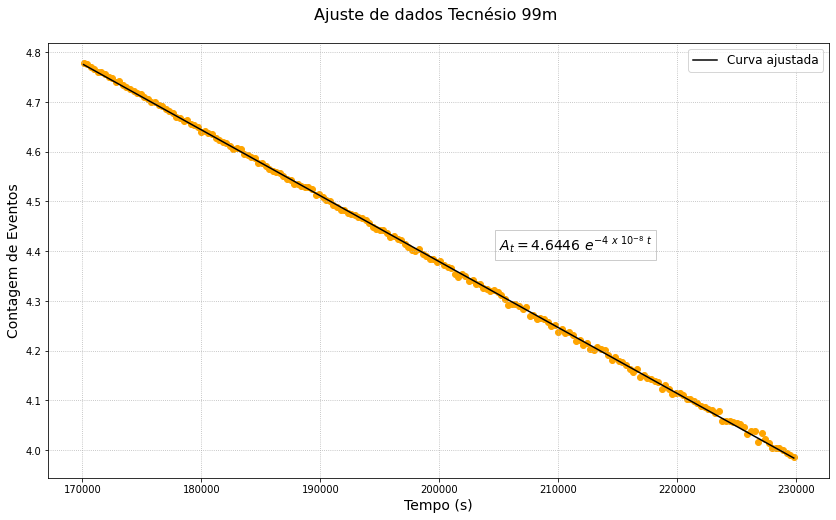

In [109]:
fig, ax = plt.subplots(1, figsize=(14,8))

plt.plot(data['tempo'], parametros[0]*data['tempo']+parametros[2], c='black', label='Curva ajustada')
plt.scatter(data['tempo'], data['LogTaxaMedia'], c='orange')
plt.title('Ajuste de dados Tecnésio 99m \n', fontsize='16')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(205000.0, 4.4, '$A_t = 4.6446 \ e^{-4 \ x \ 10^{-8} \ t}$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

####Meia-vida 

In [ ]:
mv_gm = poptgm[1] * np.log(2)
mv_gm

-0.0005751626959866094